In [1]:
from gmm_dimension_reduction import GaussianMixtureModel
from gmm_dimension_reduction import dimension_reduction
from gmm_dimension_reduction.visualization import plot_gmm
from gmm_dimension_reduction import PCA as own_PCA

In [2]:
from sklearn.datasets import load_diabetes
from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.mixture import GaussianMixture

import numpy as np
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

# Diabetes dataset

In [4]:
diabetes = datasets.load_diabetes()

In [5]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
pca = PCA(n_components=2)
pca.fit(diabetes_df)

PCA(n_components=2)

In [7]:
pca_eigenvalues = pca.components_.T
pca_mean = pca.mean_

## Gaussian reducted by PCA

In [8]:
gm_diabetes = GaussianMixture(n_components=3, random_state=0).fit(diabetes_df)

In [9]:
weights_diabetes, means_diabetes, covariances_diabetes = dimension_reduction.gmm_pca(pca_mean, pca_eigenvalues, gm_diabetes.weights_, gm_diabetes.means_, gm_diabetes.covariances_)

In [10]:
gmm_diabetes = GaussianMixtureModel.GaussianMixtureModel(weights_diabetes, means_diabetes, covariances_diabetes)

In [11]:
datapoints = pd.DataFrame(pca.transform(diabetes_df), columns=["PC1", "PC2"])

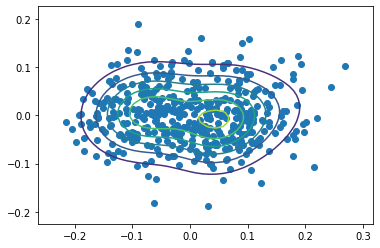

In [12]:
plot_gmm(gmm_diabetes, datapoints=datapoints)

## Gaussian learned on data reduced by PCA

In [13]:
gm_diabetes_pca = GaussianMixture(n_components=3, random_state=0).fit(datapoints)

In [14]:
gmm_diabetes_pca_reduced = GaussianMixtureModel.GaussianMixtureModel(gm_diabetes_pca.weights_, gm_diabetes_pca.means_, gm_diabetes_pca.covariances_)

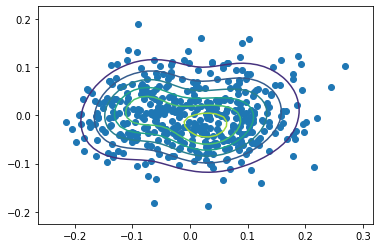

In [15]:
plot_gmm(gmm_diabetes_pca_reduced, datapoints=datapoints)

# Iris dataset

In [16]:
iris = datasets.load_iris()

In [17]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
pca_iris = PCA(n_components=2)
pca_iris.fit(iris_df)

PCA(n_components=2)

In [19]:
pca_iris_eigenvalues = pca_iris.components_.T
pca_iris_mean = pca_iris.mean_

## Gaussian reducted by PCA

In [21]:
gm_iris = GaussianMixture(n_components=3, random_state=0).fit(iris_df)

In [22]:
weights_iris, means_iris, covariances_iris = dimension_reduction.gmm_pca(pca_iris_mean, pca_iris_eigenvalues, gm_iris.weights_, gm_iris.means_, gm_iris.covariances_)

In [23]:
gmm_iris = GaussianMixtureModel.GaussianMixtureModel(weights_iris, means_iris, covariances_iris)

In [24]:
iris_datapoints = pd.DataFrame(pca_iris.transform(iris_df), columns=["PC1", "PC2"])

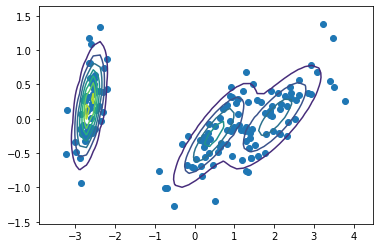

In [25]:
plot_gmm(gmm_iris, datapoints=iris_datapoints)

## Gaussian learned on data reduced by PCA

In [26]:
gm_iris_pca = GaussianMixture(n_components=3, random_state=0).fit(iris_datapoints)

In [27]:
gmm_iris_pca_reduced = GaussianMixtureModel.GaussianMixtureModel(gm_iris_pca.weights_, gm_iris_pca.means_, gm_iris_pca.covariances_)

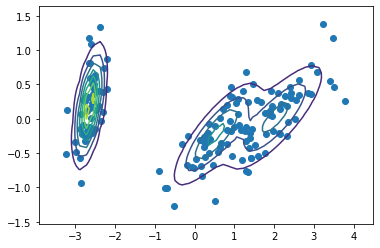

In [28]:
plot_gmm(gmm_iris_pca_reduced, datapoints=iris_datapoints)